# Glass Classification and Analysis

## What is glass classification?

Basically there are different types of glasses in the dataset which we have to use and predict and analyse the score.

For predcition we have to use model that are there in the machine learning and from that we have to find which model is more efficient.

## Exploring and Analyzing data

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.rcParams['figure.figsize'] = [10,6]

In [2]:
# Reading data from the file and storing it in dataframe i.e. 'data' using 
# pandas library.
data = pd.read_csv('glass.csv')
data.head() # head is used to print the first 5 rows from the dataset.

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# Finding total number of rows and columns in the dataset using shape method.
data.shape

(214, 10)

As shown there are total number of rows=214 and total number of columns=10 which shows 9 different types of glasses and 1 column with the name as 'type'.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


There are no null values in any of the column in the dataframe as shown above using the info() method.

In [5]:
type = data['Type'].groupby(data['Type']).count()
type

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

As mentioned in the above cell output that majority data is of type 1 and 2.

Describe method is used to get mean, standard deviation, min, max, etc of all the columns in the dataframe as shown below.

In [6]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
# We will find the correlation using the corr() method whith 'Type' column.
data.corr()['Type'].sort_values()

Mg     -0.744993
Fe     -0.188278
RI     -0.164237
K      -0.010054
Ca      0.000952
Si      0.151565
Na      0.502898
Ba      0.575161
Al      0.598829
Type    1.000000
Name: Type, dtype: float64

<AxesSubplot:>

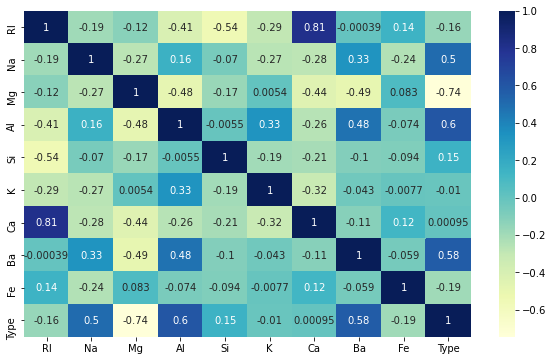

In [8]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
ax

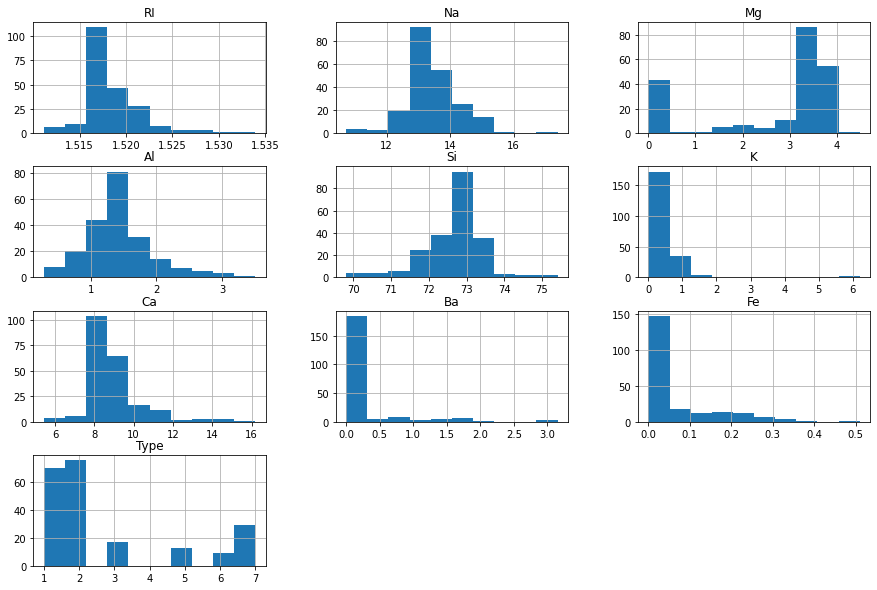

In [9]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

<AxesSubplot:xlabel='Type', ylabel='count'>

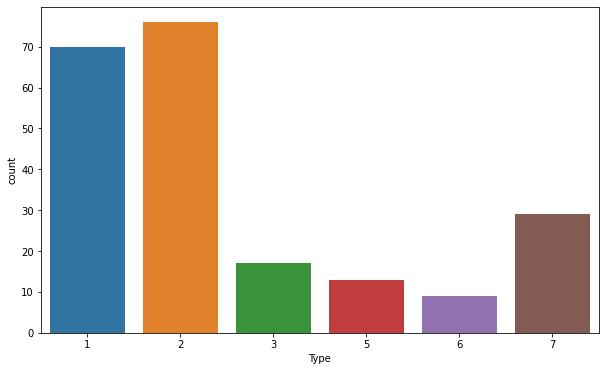

In [10]:
sns.countplot(data['Type'])

we have to take care here about one thing that is, training set is small. so what we will do ,that we will train and classify roughly first and then we can improve over it considering over or under fitting.

#### Preprocessing Data

In [11]:
#Import MinMaxScaler module from scikit-learn library.
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Now we will drop the Type column from the dataframe so that we can easily 
# normalize the data set.

X = data.drop('Type',axis=1)
y = data['Type']
x = X.values # Returns a numpy array.

In [13]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5,6,7,8
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


#### Splitting Data

In [14]:
# Now we will split the dataset into the training and testing data using train_test_split module 
# from scikit-learn library.

from sklearn.model_selection import train_test_split

In [15]:
# Dividing the dataset into train and test data with a 7:3 ratio as shown below.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)

(149, 9)


### Different Classification techniques with the accuracy of the model

#### DecisionTreeClassifier model

##### 1. ID3 Decision Tree

ID3 stands for Iterative Dichotomiser 3 and is named such because the algorithm iteratively (repeatedly) dichotomizes(divides) features into two or more groups at each step. ID3 uses a top-down greedy approach to build a decision tree.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6461538461538462

#### Advantages of ID3 Decision Tree Algorithm

- Builds the fastest tree.
- Understandable prediction rules are created from the training data.
- Only need to test enough attributes until all data is classified.
- Whole dataset is searched to create tree.

#### Disadvantages of ID3 Decision Tree Algorithm

- Data may be over-fitted or over-classified, if a small sample is tested.
- Only one attribute at a time is tested for making a decision.
- Classifying continuous data may be computationally expensive, as many trees must be generated to see where to break the continum.

#### 2. CART Decision Tree

Classification And Regression Trees (CART) algorithm is a classification algorithm for building a decision tree based on Gini's impurity index as splitting criterion. CART is a binary tree build by splitting node into two child nodes repeatedly.

This algorithm works repeatedly in three steps as mentioned below:

 1. Find each feature’s best split. For each feature with K different values there exist K-1 possible splits. Find the split, which maximizes the splitting criterion. The resulting set of splits contains best splits (one for each feature).
 2. Find the node’s best split. Among the best splits from Step i find the one, which maximizes the splitting criterion.
 3. Split the node using best node split from Step ii and repeat from Step i until stopping criterion is satisfied.

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import math

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
asc = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(asc, mse, rmse)

0.7230769230769231 1.2153846153846153 1.1024448355290233


#### Advantages of CART Decision Tree Algorithm

- Transparent and easy to understand.
- Decision trees can inherently perform multiclass classification.
- They can handle both numerical and categorical data.
- Nonlinear relationships among features do not affect the performance of the decision trees.

#### Disadvantages of CART Decision Tree Algorithm

- A small change in the dataset can make the tree structure unstable which can cause variance.
- It does not work well if there are smooth limits.
- It has high variance and it is unstable.
- Decision tree learners create underfit trees if some classes are imbalanced.

#### 3. RandomForestClassifier model

###### What is Random Forest Classifier?

A random forest is a machine learning technique that's used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems. A random forest algorithm consists of many decision trees.

Random forest is a supervised learning algorithm which is used for both classification as well as regression. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
asc = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(asc, mse, rmse)

0.6307692307692307 2.076923076923077 1.4411533842457842


#### Advantages of Random Forest

- Random Forest is capable of performing both Classification and Regression tasks.
- It is capable of handling large datasets with high dimensionality.
- It enhances the accuracy of the model and prevents the overfitting issue.

#### Disadvantages of Random Forest

- Although random forest can be used for both classification and regression tasks, it is not more suitable for Regression tasks.

## Conclusion

As there are different classification techniques to predict the accuracy of the glass dataset. We have tried 3 models as shown above such that we can select the model with the high accuracy result. We used 'ID3 Decision Tree', 'CART Decision Tree', 'Random Forest Classifier' and from that we find that the accuracy of the 'CART decision tree' is highest among all and for our dataset the 'CART decision tree' is the best model for predicting the results.